<a href="https://colab.research.google.com/github/kavyasreemaniga/DATA_690/blob/main/Assignments/690_assignment_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 08



*   Kavya Sree Maniga
*   10/23/2022



## 1. Use Pandas to read the file census_costs.txt file

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
census = "https://raw.githubusercontent.com/wcj365/python-stats-dataviz/master/assignments/assignment_08_census_cost/census_costs.txt"

In [48]:
df=pd.read_csv(census, skiprows=1, sep="\t")
df.head()

,Census Year,Total Population,Census Cost,Average Cost Per Person
0,1790,"3,929,214","$44,377",1.13 cents
1,1800,"5,308,483","$66,109",1.24 cents
2,1810,"7,239,881","$178,445",2.46 cents
3,1820,"9,633,822","$208,526",2.16 cents
4,1830,"12,866,020","$378,545",2.94 cents


In [49]:
df.tail(3)

,Census Year,Total Population,Census Cost,Average Cost Per Person
20,1990,"248,718,301","$2,492,830,000",$10.02
21,2000,"281,421,906",$4.5 Billion,$15.99
22,2010*,"308,745,538",$13 Billion,$42.11


## 2. Find out how many rows and columns it has

In [50]:
df.shape

(23, 4)

## 3. Display first 10, last 10, and random 10 rows

In [51]:
df.head(10)

,Census Year,Total Population,Census Cost,Average Cost Per Person
0,1790,"3,929,214","$44,377",1.13 cents
1,1800,"5,308,483","$66,109",1.24 cents
2,1810,"7,239,881","$178,445",2.46 cents
3,1820,"9,633,822","$208,526",2.16 cents
4,1830,"12,866,020","$378,545",2.94 cents
5,1840,"17,069,458","$833,371",4.88 cents
6,1850,"23,191,876","$1,423,351",6.14 cents
7,1860,"31,443,321","$1,969,377",6.26 cents
8,1870,"38,558,371","$3,421,198",8.87 cents
9,1880,"50,155,783","$5,790,678",11.54 cents


In [52]:
df.tail(10)

,Census Year,Total Population,Census Cost,Average Cost Per Person
13,1920,"105,710,620","$25,117,000",23.76 cents
14,1930,"122,775,046","$40,156,000",32.71 cents
15,1940,"131,669,275","$67,527,000",51.29 cents
16,1950,"151,325,798","$91,462,000",60.44 cents
17,1960,"179,323,175","$127,934,000",71.34 cents
18,1970,"203,302,031","$247,653,000",$1.22
19,1980,"226,542,199","$1,078,488,000",$4.76
20,1990,"248,718,301","$2,492,830,000",$10.02
21,2000,"281,421,906",$4.5 Billion,$15.99
22,2010*,"308,745,538",$13 Billion,$42.11


In [53]:
df.sample(10)

,Census Year,Total Population,Census Cost,Average Cost Per Person
22,2010*,"308,745,538",$13 Billion,$42.11
14,1930,"122,775,046","$40,156,000",32.71 cents
9,1880,"50,155,783","$5,790,678",11.54 cents
21,2000,"281,421,906",$4.5 Billion,$15.99
3,1820,"9,633,822","$208,526",2.16 cents
1,1800,"5,308,483","$66,109",1.24 cents
11,1900,"76,303,387","$11,854,000",15.54 cents
12,1910,"91,972,266","$15,968,000",17.07 cents
17,1960,"179,323,175","$127,934,000",71.34 cents
4,1830,"12,866,020","$378,545",2.94 cents


## 4. Find out the data types of all columns - use info() function

In [54]:
df.dtypes

Census Year                object
Total Population           object
Census Cost                object
Average Cost Per Person    object
dtype: object

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Census Year              23 non-null     object
 1   Total Population         23 non-null     object
 2   Census Cost              23 non-null     object
 3   Average Cost Per Person  23 non-null     object
dtypes: object(4)
memory usage: 864.0+ bytes


## 5. Find out the summary statistics of all columns

In [56]:
df.describe()

,Census Year,Total Population,Census Cost,Average Cost Per Person
count,23,23,23,23
unique,23,23,23,23
top,1790,"3,929,214","$44,377",1.13 cents
freq,1,1,1,1


In [57]:
df.agg(
    {
        "Census Year": ["min", "max", "median", "skew"],
        "Census Cost": ["min", "max", "median", "skew"]
    }
)

,Census Year,Census Cost
min,1790,"$1,078,488,000"
max,2010*,"$91,462,000"


## 6.Cleanse the data to make the year, population, cost, cost per person numerical type


*   Code functions to cleanse the columns. One function for one column
*   use apply() method of data frame to apply the functions to the columns for data cleansing




In [58]:
def year(Year_dtype):
    n =  "*" in Year_dtype
    if n == True:
        year = Year_dtype.replace("*", "")
    else:
        year = Year_dtype

    return int(year)

Reference : https://openclassrooms.com/en/courses/6037301-perform-an-initial-data-analysis/6051606-cleanse-your-dataset-using-python

In [59]:
df["Census Year"] = df["Census Year"].apply(year)

In [60]:
def population(Pop):
    if "," in Pop:
        pop = Pop.replace(",","")
    else:
        pop = Pop
    return int(pop)

In [61]:
df["Total Population"] = df["Total Population"].apply(population)


In [62]:
df["Census Cost"] = df["Census Cost"].apply(cost)

In [63]:
def cost(cost):
    cost1=cost.replace("$","")
    cost2=cost1.replace("\n","")
    if "cents" in cost2:
         avg_cost3=float(cost2.replace(" cents",""))/100
    else:
         avg_cost3=float(cost2)
    r = round(avg_cost3, 5)
    return (r)

In [64]:
df["Average Cost Per Person"] = df["Average Cost Per Person"].apply(avg_cost)

In [65]:
df

,Census Year,Total Population,Census Cost,Average Cost Per Person
0,1790,3929214,44377,0.0113
1,1800,5308483,66109,0.0124
2,1810,7239881,178445,0.0246
3,1820,9633822,208526,0.0216
4,1830,12866020,378545,0.0294
5,1840,17069458,833371,0.0488
6,1850,23191876,1423351,0.0614
7,1860,31443321,1969377,0.0626
8,1870,38558371,3421198,0.0887
9,1880,50155783,5790678,0.1154


##7. Find out the summary statistics of the numerical columns - use describe() function

In [66]:
df.describe()

,Census Year,Total Population,Census Cost,Average Cost Per Person
count,23.0000,2.300000e+01,2.300000e+01,23.000000
mean,1900.0000,1.039211e+08,9.445587e+08,3.368739
std,67.8233,9.622629e+07,2.830037e+09,9.278241
min,1790.0000,3.929214e+06,4.437700e+04,0.011300
25%,1845.0000,2.013067e+07,1.128361e+06,0.055100
50%,1900.0000,7.630339e+07,1.185400e+07,0.170700
75%,1955.0000,1.653245e+08,1.096980e+08,0.658900
max,2010.0000,3.087455e+08,1.300000e+10,42.110000


## 8. Use Plotly to plot the average cost per person over time.

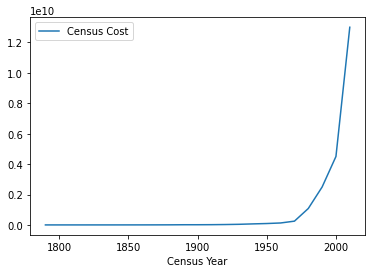

In [67]:
df.plot("Census Year", "Census Cost")

## 9. Use Plotly to plot the scatter plot of Total Population vs Total Cost.

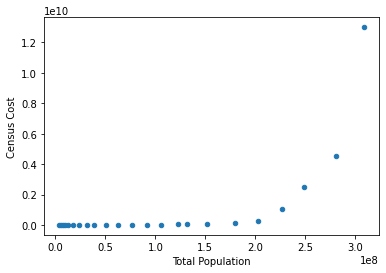

In [68]:
df.plot.scatter("Total Population", "Census Cost")